In [23]:
import pandas as pd
import numpy as np

In [24]:
# Create data frame containing all 6 day-long load profiles
general_load_profile = (pd.read_csv("../data/Load Profile - Sheet5.csv")
                        .T
                        .drop("Unnamed: 0")
                        .rename(columns={
                            0 : "Weekend Rain",
                            1 : "Weekend Dry",
                            2 : "Weekday School Rain",
                            3 : "Weekday School Dry",
                            4 : "Weekday Break Rain",
                            5 : "Weekday Break Dry"}
                           )
                       ).astype("float")

In [25]:
general_load_profile

,Weekend Rain,Weekend Dry,Weekday School Rain,Weekday School Dry,Weekday Break Rain,Weekday Break Dry
1:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
2:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
3:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
4:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
5:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
6:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
7:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
8:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
9:00:00 AM,5250.0,6205.0,5716.0,5716.0,4772.0,5727.0
10:00:00 AM,5250.0,6205.0,5716.0,5716.0,4772.0,5727.0


In [26]:
# Create empty dataframe that will become the year long load profile
load_profile = pd.DataFrame(range(8760), index=pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1))

In [27]:
# Assign a load profile for each day of week in January
load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Sunday"), 0
] = np.tile(general_load_profile["Weekend Dry"].values, 5)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Saturday"), 0
] = np.tile(general_load_profile["Weekend Dry"].values, 4)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Monday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 5)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Tuesday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 5)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Wednesday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 4)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Thursday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 4)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Friday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 4)



In [28]:
d = pd.date_range(start="1/1/2007", end="1/1/2008", freq="D")

In [40]:
# dict defining which load profile we want for weekend and weekday of each month
spec = dict(January=dict(weekday="Weekday School Dry", weekend="Weekend Dry"))

# stiches together entire year load profile based on spec
for month in spec:
    #creates a Series with number of time each day occurs in a given month.
    dayOccurances = d[d.month_name() == month].day_name().value_counts()
    print(spec.get(month).get("weekend"))
    
    load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Sunday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekend")].values, dayOccurances.get("Sunday"))

load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Saturday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekend")].values, dayOccurances.get("Saturday"))

load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Monday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, dayOccurances.get("Monday"))

load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Tuesday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, dayOccurances.get("Tuesday"))

load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Wednesday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, dayOccurances.get("Wednesday"))

load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Thursday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, dayOccurances.get("Thursday"))

load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Friday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, dayOccurances.get("Friday"))

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
Weekend Dry


ValueError: shape mismatch: value array of shape (96,)  could not be broadcast to indexing result of shape (120,)

<AxesSubplot:>

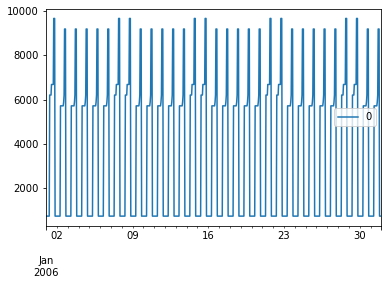

In [9]:
load_profile[load_profile.index.month_name() == "January"].plot()

In [10]:
d = pd.date_range(start="1/1/2007", end="1/1/2008", freq="D")

In [14]:
dayOccurances = d[d.month_name() == "March"].day_name().value_counts()
print(dayOccurances)
print(dayOccurances.get("Sunday"))
# value_counts is returning a Series. We can call.get() on series using index or key

Thursday     5
Friday       5
Saturday     5
Tuesday      4
Wednesday    4
Monday       4
Sunday       4
dtype: int64
4


In [15]:
load_profile.loc["1/1/2006"]

,0
2006-01-01 00:00:00,726.0
2006-01-01 01:00:00,726.0
2006-01-01 02:00:00,726.0
2006-01-01 03:00:00,726.0
2006-01-01 04:00:00,726.0
2006-01-01 05:00:00,726.0
2006-01-01 06:00:00,726.0
2006-01-01 07:00:00,726.0
2006-01-01 08:00:00,6205.0
2006-01-01 09:00:00,6205.0
